在圖像中 image 的轉換是很重要的，因為這樣可以讓image可以有更多的變化，讓dataset可以更豐富，或者透過這些改變我們可以剪裁，調整大小，添加文本到圖像，旋轉，灰階轉換。
而在本篇的實作範例中我們將會參考https://github.com/erhwenkuo/deep-learning-with-keras-notebooks。
玩玩看它們的應用。

In [1]:
# 把一些警告的訊息暫時関掉
import warnings
warnings.filterwarnings('ignore')

# Utilities相關函式庫
import os

# 圖像處理/展現的相關函式庫
import matplotlib.pyplot as plt

In [2]:
# 專案的根目錄路徑
ROOT_DIR = os.getcwd()

# 訓練/驗證用的資料目錄
DATA_PATH = os.path.join(ROOT_DIR, "dataset")

# 測試用圖像
TEST_IMAGE = os.path.join(DATA_PATH, "hugh_jackman.jpg")

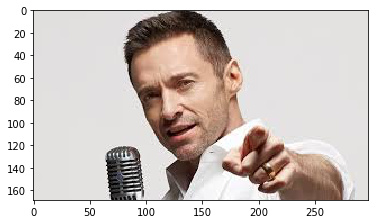

In [3]:
from PIL import Image

# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 儲存圖像檔並轉換格式(jpg -> png)
image.save(os.path.join(DATA_PATH, "new_image.png"))

plt.imshow(image)
plt.show()

In [4]:
image = Image.open(TEST_IMAGE)
new_image = image.resize((400, 400))

print("orinigal image size", image.size)
print("new image size", new_image.size)

plt.imshow(new_image)

orinigal image size (298, 169)
new image size (400, 400)


新的縮圖大小:  (200, 113)


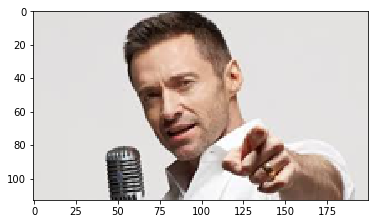

In [6]:
# 載入圖像檔
new_image = Image.open(TEST_IMAGE)

# 產生縮圖並保持長寬比
new_image.thumbnail((200, 400))

print('新的縮圖大小: ', new_image.size)

plt.imshow(new_image)
plt.show()

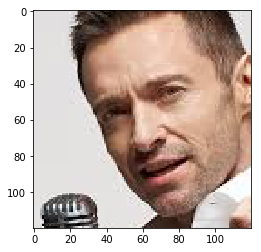

In [14]:
image = Image.open(TEST_IMAGE)

x1 = 60
x2 = 180
y1 = 20
y2 = 140

bbox = (x1, y1, x2, y2)

cropped_image = image.crop(bbox)
plt.imshow(cropped_image)
plt.show()

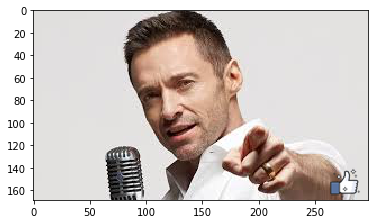

In [25]:
image = Image.open(TEST_IMAGE)

logo = Image.open(os.path.join(DATA_PATH, "good.png"))
logo.thumbnail((40, 200))

image_copy = image.copy()

position = ((image_copy.width - logo.width), (image_copy.height - logo.height))

image_copy.paste(logo, position, logo)

plt.imshow(image_copy)
plt.show()

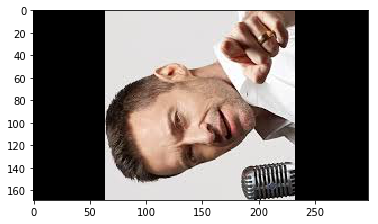

In [28]:
image = Image.open(TEST_IMAGE)

image_rotate_90 = image.rotate(90)

plt.imshow(image_rotate_90)
plt.show()

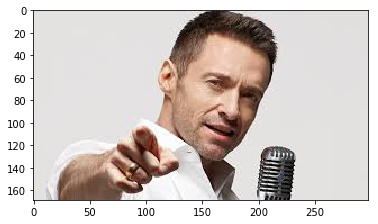

In [34]:
image = Image.open(TEST_IMAGE)

image_transpose_left_right = image.transpose(Image.FLIP_LEFT_RIGHT)

plt.imshow(image_transpose_left_right)
plt.show()

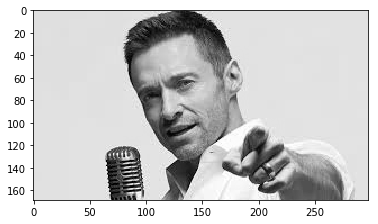

In [44]:
# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 將彩色轉換成灰階
greyscale_image = image.convert('L') 

# 注意要註明cmat='gray'才能夠正確秀出灰階圖像
plt.imshow(greyscale_image, cmap='gray') 
plt.show()

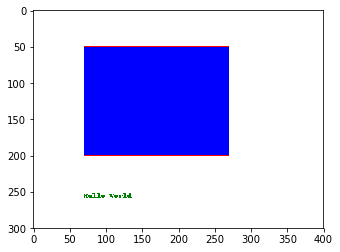

In [42]:
from PIL import Image, ImageDraw, ImageFont

# 產生一個有4個顏色channels的空白圖像
blank_image = Image.new('RGBA', (400, 300), 'white')
 # 在blank_image圖像上繪圖
img_draw = ImageDraw.Draw(blank_image)

# 畫一個矩形
img_draw.rectangle((70, 50, 270, 200), outline='red', fill='blue')

#放上文字訊息到圖像上
img_draw.text((70, 250), 'Hello World', fill='green')

plt.imshow(blank_image); plt.show()

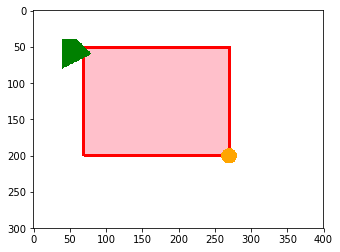

In [43]:
from PIL import Image, ImageDraw, ImageFont

# 產生一個有4個顏色channels的空白圖像
blank_image = Image.new('RGBA', (400, 300), 'white')

img_draw = ImageDraw.Draw(blank_image) # 在blank_image圖像上繪圖

# 在PIL要可以用rectangle來劃一個四方形, 但是無法控制框線的粗細
img_draw.rectangle((70, 50, 270, 200), outline= None, fill='pink')

# 透過畫線來畫一個四方框的框線並控制粗細
img_draw.line([(70,50),(270,50),(270,200),(70,200),(70,50)], fill='red', width=4)

# 在PIL要畫一個可以控制大小的圖要透過以下的手法
r = 10 # 設定半徑

# 以圖的中心點(x,y)來計算框住圓的邊界框座標[(x1,y1),(x2,y2)]
img_draw.ellipse((270-r,200-r, 270+r, 200+r), fill='orange') 

# 畫一個多邊形
img_draw.polygon([(40, 40), (40, 80), (80, 60), (60, 40)], fill='green', outline=None)

plt.imshow(blank_image); plt.show()